# Import libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [4]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.4 MB/s eta 0:00:00


In [5]:
from sklearn_extra.cluster import KMedoids

# Load the dataset


In [6]:
data = pd.read_csv('cc_general.csv')

In [7]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Verificar si todos los valores en una columna son únicos
print(data['CUST_ID'].is_unique)

True


In [ ]:
data= data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

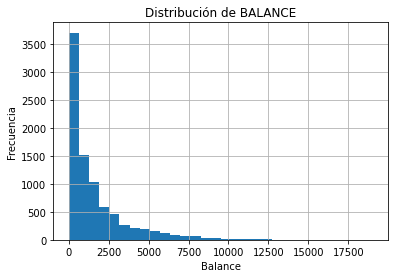

In [ ]:
# Histograma de BALANCE
import matplotlib.pyplot as plt
data['BALANCE'].hist(bins=30)
plt.title('Distribución de BALANCE')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#La mayoría de los clientes tienen saldos relativamente pequeños en sus tarjetas de crédito.
#Pocos clientes tienen saldos que exceden los 5,000.
#Esto significa que hay más personas con saldos bajos (entre 0 y 2500) y menos personas con saldos altos.
#Esto podría sugerir que la mayoría de los usuarios no están utilizando la tarjeta para acumular grandes cantidades de deuda o que pagan sus saldos regularmente para mantenerlos bajos.

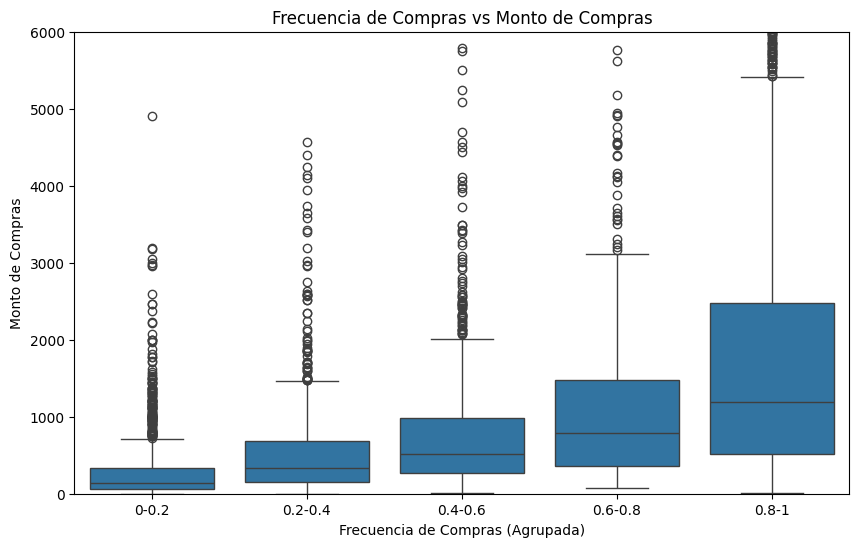

In [ ]:
# Frecuencia de Compras
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']
data['PURCHASES_FREQUENCY_GROUPED'] = pd.cut(data['PURCHASES_FREQUENCY'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PURCHASES_FREQUENCY_GROUPED', y='PURCHASES', data=data)
plt.title('Frecuencia de Compras vs Monto de Compras')
plt.xlabel('Frecuencia de Compras (Agrupada)')
plt.ylabel('Monto de Compras')
plt.ylim(0, 6000)
plt.show()

In [ ]:
#Los usuarios que compran con mayor frecuencia (frecuencia de compra alta) tienden a tener montos de compra más altos.
#Existe una gran variabilidad en los montos de compra, especialmente en los rangos de frecuencia media a alta.
#Algunos usuarios realizan compras extremadamente altas (outliers), lo que puede indicar comportamiento inusual o de gasto excesivo.

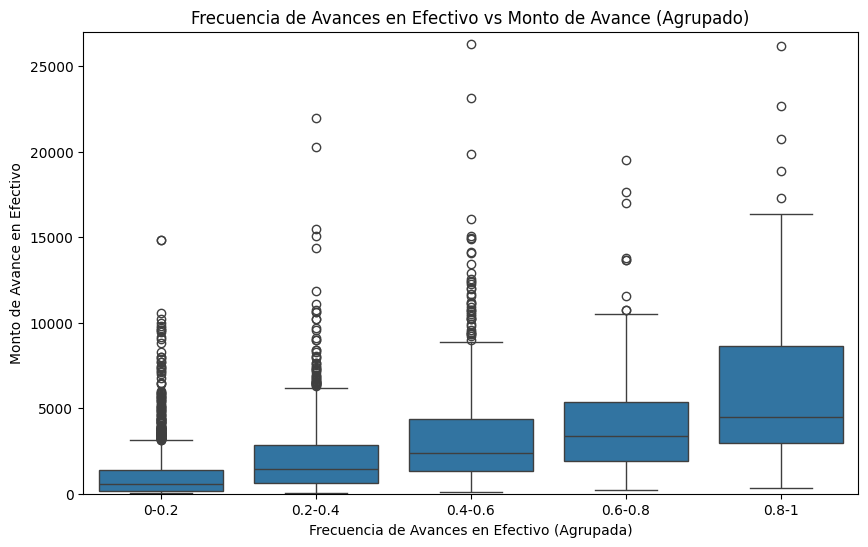

In [ ]:
# Análisis de uso de avances en efectivo
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']
data['CASH_ADVANCE_FREQUENCY_GROUPED'] = pd.cut(data['CASH_ADVANCE_FREQUENCY'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.boxplot(x='CASH_ADVANCE_FREQUENCY_GROUPED', y='CASH_ADVANCE', data=data)
plt.title('Frecuencia de Avances en Efectivo vs Monto de Avance (Agrupado)')
plt.xlabel('Frecuencia de Avances en Efectivo (Agrupada)')
plt.ylabel('Monto de Avance en Efectivo')
plt.ylim(0, 27000)
plt.show()

In [ ]:
#Los clientes con baja frecuencia de avances (0-0.2) tienden a realizar avances más pequeños y con menor variabilidad.
#A medida que la frecuencia aumenta, se observa que los clientes no solo retiran más a menudo, sino que también el monto típico del avance es mayor.
#La dispersión más alta se observa en los grupos de mayor frecuencia (0.8-1), donde algunos clientes alcanzan montos superiores a 20,000 unidades monetarias.

C:\Users\enina\AppData\Local\Temp\ipykernel_14200\4110389511.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_median = data.groupby('CREDIT_LIMIT_GROUPED')['PURCHASES'].median().reset_index()


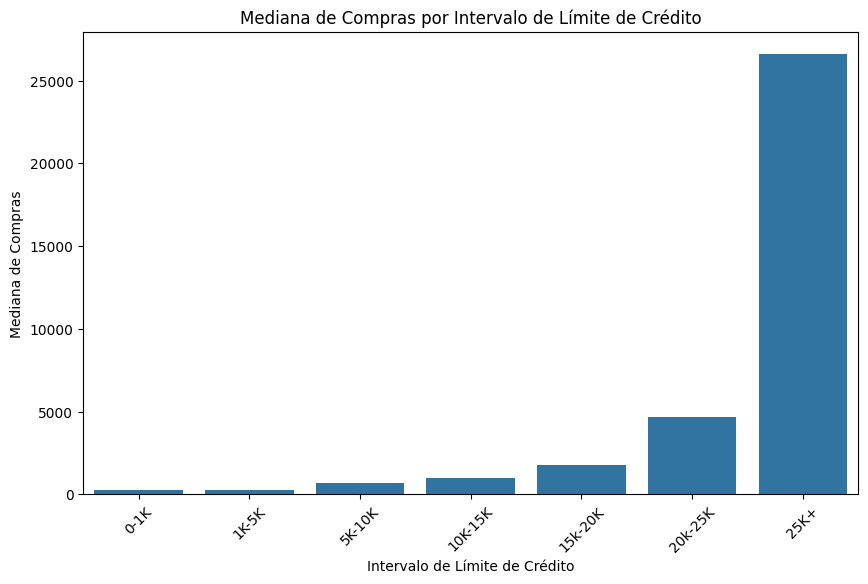

In [ ]:
bins = [0, 1000, 5000, 10000, 15000, 20000, 25000, float('inf')]
labels = ['0-1K', '1K-5K', '5K-10K', '10K-15K', '15k-20K', '20k-25K', '25K+']

# Crea la columna CREDIT_LIMIT_GROUPED
data['CREDIT_LIMIT_GROUPED'] = pd.cut(data['CREDIT_LIMIT'], bins=bins, labels=labels)

# Calcular la mediana de Compras para cada grupo
grouped_data_median = data.groupby('CREDIT_LIMIT_GROUPED')['PURCHASES'].median().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='CREDIT_LIMIT_GROUPED', y='PURCHASES', data=grouped_data_median)
plt.title('Mediana de Compras por Intervalo de Límite de Crédito')
plt.xlabel('Intervalo de Límite de Crédito')
plt.ylabel('Mediana de Compras')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Los clientes con límites bajos (0-1K, 1K-5K) muestran una mediana de compras baja, sugiriendo que su comportamiento de consumo está limitado por el crédito disponible.
#El incremento de la mediana de compras es pronunciado en el último grupo (>25K), lo que podría indicar que los clientes con un límite tan alto aprovechan su mayor capacidad de gasto, realizando significativamente más compras que los demás.
#Los rangos de 0-1K hasta 15K muestran mediana de compras relativamente bajas y bastante cercanas entre sí, lo que sugiere que, hasta cierto punto, el límite de crédito no influye tanto en el comportamiento de consumo. Sin embargo, a partir de los límites de 20K en adelante, hay un incremento notable.


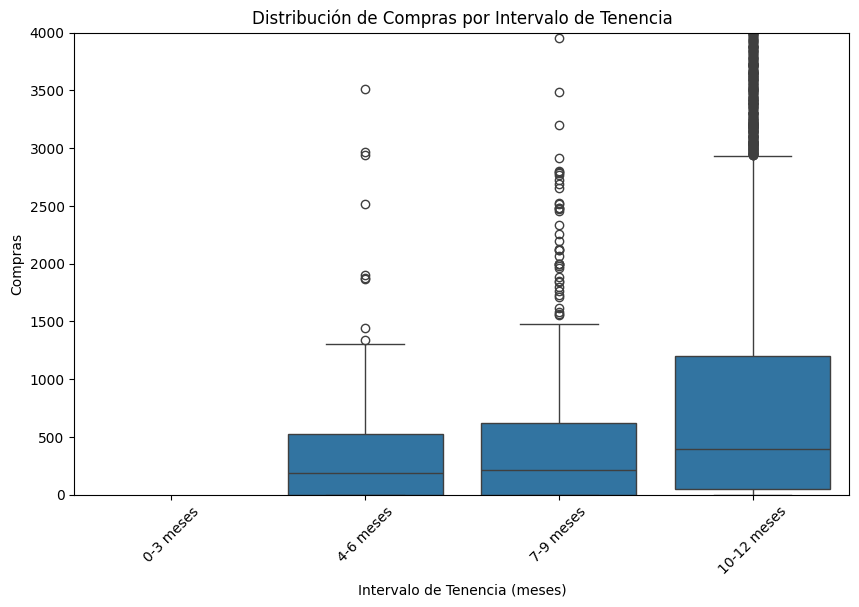

In [ ]:
bins = [0, 3, 6, 9, 12]  # límites en meses
labels = ['0-3 meses', '4-6 meses', '7-9 meses', '10-12 meses']

data['TENURE_GROUP'] = pd.cut(data['TENURE'], bins=bins, labels=labels)

# Ahora puedes crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='TENURE_GROUP', y='PURCHASES', data=data)
plt.title('Distribución de Compras por Intervalo de Tenencia')
plt.xlabel('Intervalo de Tenencia (meses)')
plt.ylabel('Compras')
plt.xticks(rotation=45)
plt.ylim(0, 4000)
plt.show()


In [ ]:
#Hay una tendencia creciente en la mediana de compras conforme los clientes llevan más tiempo con su tarjeta.
#Esto sugiere que los clientes tienden a incrementar su actividad de compra con el tiempo.
#Esto puede deberse a una mayor confianza en el uso del crédito, promociones recibidas o simplemente la adaptación al uso de la tarjeta.

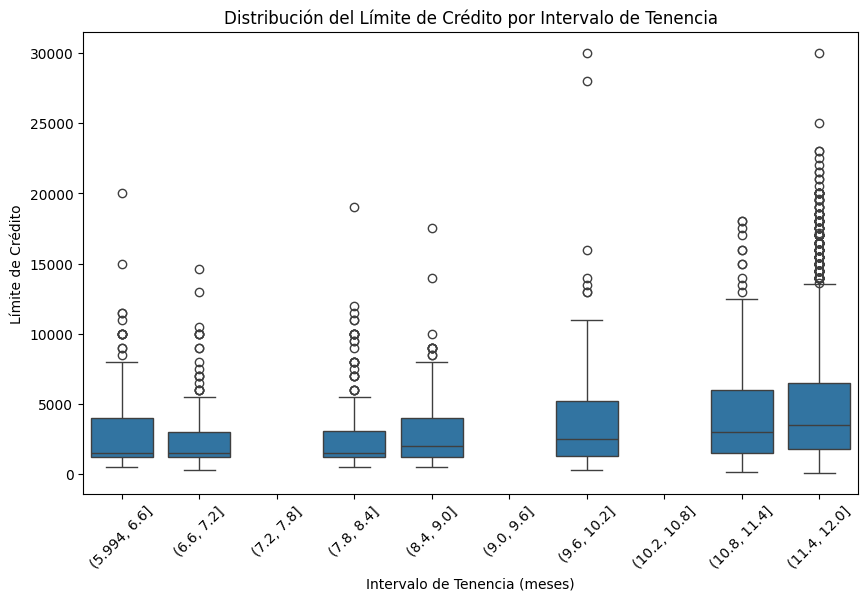

In [ ]:
# Gráfico de cajas para ver la distribución del límite de crédito por intervalos de tenencia
plt.figure(figsize=(10, 6))
data['TENURE_GROUP'] = pd.cut(data['TENURE'], bins=10)  # Agrupando TENURE en intervalos
sns.boxplot(x='TENURE_GROUP', y='CREDIT_LIMIT', data=data)
plt.title('Distribución del Límite de Crédito por Intervalo de Tenencia')
plt.xlabel('Intervalo de Tenencia (meses)')
plt.ylabel('Límite de Crédito')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Se observa una tendencia creciente indicando que cuanto más tiempo se cuenta con la tarjeta mayor consideración hay en incrementarle el limite de crédito.
#A la par se observa que hay mayor cantidad de outiers en el rango de mayor tenencia

C:\Users\enina\AppData\Local\Temp\ipykernel_14200\1553502981.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_payment_by_credit_range = data.groupby('rango_credito')['PRC_FULL_PAYMENT'].mean().reset_index()


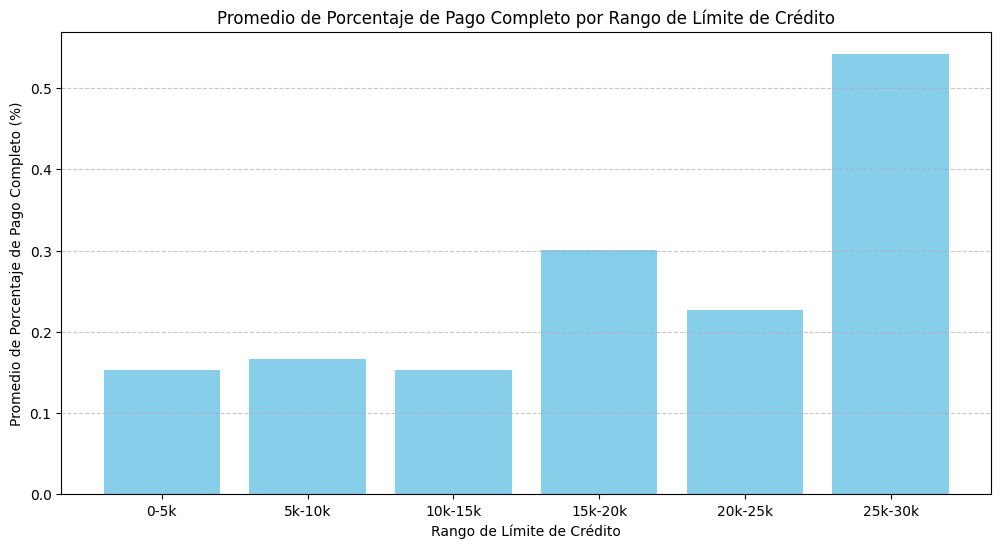

In [ ]:
# Crear rangos para CREDIT_LIMIT
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]  # Define tus propios rangos
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k']
data['rango_credito'] = pd.cut(data['CREDIT_LIMIT'], bins=bins, labels=labels)

# Calcular el promedio de PRCFULLPAYMENT por cada rango de crédito
avg_payment_by_credit_range = data.groupby('rango_credito')['PRC_FULL_PAYMENT'].mean().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(avg_payment_by_credit_range['rango_credito'], avg_payment_by_credit_range['PRC_FULL_PAYMENT'], color='skyblue')
plt.title('Promedio de Porcentaje de Pago Completo por Rango de Límite de Crédito')
plt.xlabel('Rango de Límite de Crédito')
plt.ylabel('Promedio de Porcentaje de Pago Completo (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Crear tabla de usuarios en rangos de 'CREDIT_LIMIT_GROUPED'
credit_limit_counts = data['CREDIT_LIMIT_GROUPED'].value_counts().reset_index()
credit_limit_counts.columns = ['Rango de Límite de Crédito', 'Cantidad de Usuarios']

# Calcular el porcentaje de participación
credit_limit_counts['Porcentaje de Participación (%)'] = (
    credit_limit_counts['Cantidad de Usuarios'] / credit_limit_counts['Cantidad de Usuarios'].sum() * 100
).round(2)

# Mostrar tabla
print("Cantidad de usuarios por rango de límite de crédito con porcentajes:")
display(credit_limit_counts)

Cantidad de usuarios por rango de límite de crédito con porcentajes:


,Rango de Límite de Crédito,Cantidad de Usuarios,Porcentaje de Participación (%)
0,1K-5K,4995,57.84
1,5K-10K,2163,25.05
2,0-1K,803,9.30
3,10K-15K,526,6.09
4,15k-20K,136,1.57
5,20k-25K,10,0.12
6,25K+,3,0.03


In [ ]:
# Crear tabla de usuarios en rangos de 'TENURE_GROUP'
tenure_counts = data['TENURE_GROUP'].value_counts().reset_index()
tenure_counts.columns = ['Rango de Tenencia', 'Cantidad de Usuarios']

# Calcular el porcentaje de participación
tenure_counts['Porcentaje de Participación (%)'] = (
    tenure_counts['Cantidad de Usuarios'] / tenure_counts['Cantidad de Usuarios'].sum() * 100
).round(2)

# Mostrar tabla
print("Cantidad de usuarios por rango de tenencia con porcentajes:")
display(tenure_counts)

Cantidad de usuarios por rango de tenencia con porcentajes:


,Rango de Tenencia,Cantidad de Usuarios,Porcentaje de Participación (%)
0,"(11.4, 12.0]",7346,85.06
1,"(10.8, 11.4]",356,4.12
2,"(9.6, 10.2]",226,2.62
3,"(5.994, 6.6]",184,2.13
4,"(7.8, 8.4]",183,2.12
5,"(6.6, 7.2]",177,2.05
6,"(8.4, 9.0]",164,1.90
7,"(7.2, 7.8]",0,0.00
8,"(9.0, 9.6]",0,0.00
9,"(10.2, 10.8]",0,0.00


In [ ]:
# Crear rangos para PRC_FULL_PAYMENT
bins = [0, 0.25, 0.50, 0.75, 1.0]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
data['PRC_FULL_PAYMENT_GROUPED'] = pd.cut(data['PRC_FULL_PAYMENT'], bins=bins, labels=labels)

# Contar usuarios en rangos de 'PRC_FULL_PAYMENT_GROUPED'
full_payment_counts = data['PRC_FULL_PAYMENT_GROUPED'].value_counts().reset_index()
full_payment_counts.columns = ['Rango de Pago Completo', 'Cantidad de Usuarios']

# Calcular el porcentaje de participación
full_payment_counts['Porcentaje de Participación (%)'] = (
    full_payment_counts['Cantidad de Usuarios'] / full_payment_counts['Cantidad de Usuarios'].sum() * 100
).round(2)

# Mostrar tabla
print("Cantidad de usuarios por rango de pago completo con porcentajes:")
display(full_payment_counts)

Cantidad de usuarios por rango de pago completo con porcentajes:


,Rango de Pago Completo,Cantidad de Usuarios,Porcentaje de Participación (%)
0,0-25%,1340,43.98
1,75-100%,774,25.40
2,25-50%,587,19.26
3,50-75%,346,11.36


# Data Processing

## Data Cleaning


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
data = data.drop(columns=['CUST_ID'])

# Paso 2: Tratar valores nulos (completar con la media o eliminar)
# Rellenamos valores faltantes en 'CREDIT_LIMIT' y 'MINIMUM_PAYMENTS' con la medeia de cada columna
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

<ipython-input-9-48d09e22cc0b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)
<ipython-input-9-48d09e22cc0b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

## Feature Engineering
Cree al menos 2 variables nuevas


In [10]:
#1. Utilización del crédito (%)
data['CREDIT_UTILIZATION'] = (data['BALANCE'] / data['CREDIT_LIMIT']) * 100
data['CREDIT_UTILIZATION'] = data['CREDIT_UTILIZATION'].round(2)
print(data[['BALANCE', 'CREDIT_LIMIT', 'CREDIT_UTILIZATION']].head())


       BALANCE  CREDIT_LIMIT  CREDIT_UTILIZATION
0    40.900749        1000.0                4.09
1  3202.467416        7000.0               45.75
2  2495.148862        7500.0               33.27
3  1666.670542        7500.0               22.22
4   817.714335        1200.0               68.14


In [ ]:
#Un valor bajo puede indicar que el cliente no está utilizando su crédito completamente, lo que podría sugerir que no necesita más crédito o no está aprovechando las oportunidades de gasto.
#Un valor alto (por ejemplo, > 80%) sugiere que el cliente está cerca de su límite y podría beneficiarse de un aumento de crédito (o, alternativamente, ser un riesgo si no puede pagar a tiempo).

In [11]:
#2. Relación de pagos vs. saldo (%)
data['PAYMENTS'] = data['PAYMENTS'].replace(0, 0.01)  # Reemplaza ceros por un valor pequeño (opcional)
data['PAYMENT_TO_BALANCE_RATIO'] = (data['PAYMENTS'] / data['BALANCE']) * 100
data['PAYMENT_TO_BALANCE_RATIO'] = data['PAYMENT_TO_BALANCE_RATIO'].round(2)
print(data[['PAYMENTS', 'BALANCE', 'PAYMENT_TO_BALANCE_RATIO']].head())


      PAYMENTS      BALANCE  PAYMENT_TO_BALANCE_RATIO
0   201.802084    40.900749                    493.39
1  4103.032597  3202.467416                    128.12
2   622.066742  2495.148862                     24.93
3     0.010000  1666.670542                      0.00
4   678.334763   817.714335                     82.95


In [ ]:
# Un valor alto indica que el cliente está pagando de forma agresiva o en exceso respecto a su saldo, lo que sugiere que es financieramente sólido y puede ser elegible para un aumento de crédito.
# Un valor bajo indica que el cliente podría estar pagando el mínimo o menos de lo que debería, lo que podría ser una señal de alerta para reducir su crédito o intervenir con alguna medida.

In [12]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION,PAYMENT_TO_BALANCE_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4.09,493.39
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,45.75,128.12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,33.27,24.93
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.010000,864.206542,0.000000,12,22.22,0.00
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,68.14,82.95


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## Encoding


In [14]:
# 1. Calcular el ratio de utilización del crédito usando la columna 'CREDIT_UTILIZATION'
data['credit_usage_ratio'] = data['CREDIT_UTILIZATION'] / 100  # Convertir el porcentaje a un valor entre 0 y 1

# 2. Crear el comportamiento de pago completo
# Esta columna toma el valor 1 si el cliente ha pagado más del 80% de sus deudas en su totalidad, y 0 si no lo ha hecho.
#Esta métrica es importante porque permite identificar qué tan disciplinado es el cliente en sus pagos.
data['full_payment_behavior'] = data['PRC_FULL_PAYMENT'].apply(lambda x: 1 if x > 0.8 else 0)

# 3. Función para determinar el score de optimización de crédito
# Aumentar límite si usa <30% y paga completo, Reducir si usa >80% y no paga completo, Mantener en otros casos
def credit_optimization(row):
    if row['credit_usage_ratio'] < 0.3 and row['full_payment_behavior'] == 1:
        return 'Increase Credit Limit'
    elif row['credit_usage_ratio'] > 0.8 and row['full_payment_behavior'] == 0:
        return 'Reduce Credit Limit'
    else:
        return 'Maintain Credit Limit'

# Crear la columna 'credit_optimization_score' aplicando la función
data['credit_optimization_score'] = data.apply(credit_optimization, axis=1)

# Comprobar si existen columnas similares antes de aplicar One-Hot Encoding
existing_columns = set(data.columns)
one_hot_columns = [
    'credit_optimization_score_Increase Credit Limit',
    'credit_optimization_score_Reduce Credit Limit',
    'credit_optimization_score_Maintain Credit Limit'
]
#Eliminar las columnas duplicadas que comienzan con el prefijo `opt_score_`
data = data.drop(columns=[col for col in data.columns if col.startswith('opt_score_')], errors='ignore')
# Aplicar One-Hot Encoding solo si no existen las columnas correspondientes
if not any(col in existing_columns for col in one_hot_columns):
    data = pd.get_dummies(data, columns=['credit_optimization_score'], prefix='opt_score', prefix_sep='_')

# Definir los rangos manualmente para reflejar diferentes niveles en PAYMENT_TO_BALANCE_RATIO
def categorize_ratio(value):
    if value <= 50:
        return 'Muy Bajo'
    elif 51 <= value <= 100:
        return 'Bajo'
    elif 101 <= value <= 200:
        return 'Moderado'
    elif 201 <= value <= 500:
        return 'Alto'
    else:
        return 'Muy Alto'

# Aplicar la función para categorizar
data['PAYMENT_TO_BALANCE_CATEGORY'] = data['PAYMENT_TO_BALANCE_RATIO'].apply(categorize_ratio)

# Convertir las categorías a valores numéricos usando Label Encoding manual
category_mapping = {'Muy Bajo': 0, 'Bajo': 1, 'Moderado': 2, 'Alto': 3, 'Muy Alto': 4}
data['PAYMENT_TO_BALANCE_CATEGORY'] = data['PAYMENT_TO_BALANCE_CATEGORY'].map(category_mapping)

print(data[['PAYMENT_TO_BALANCE_RATIO', 'PAYMENT_TO_BALANCE_CATEGORY']].head())

# Mostrar el resultado de las nuevas columnas creadas
print(data.head())


   PAYMENT_TO_BALANCE_RATIO  PAYMENT_TO_BALANCE_CATEGORY
0                    493.39                            3
1                    128.12                            2
2                     24.93                            0
3                      0.00                            0
4                     82.95                            1
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3    

In [15]:
# Ver todas las columnas del DataFrame para verificar los nombres
print(data.columns)


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'CREDIT_UTILIZATION', 'PAYMENT_TO_BALANCE_RATIO',
       'credit_usage_ratio', 'full_payment_behavior',
       'opt_score_Increase Credit Limit', 'opt_score_Maintain Credit Limit',
       'opt_score_Reduce Credit Limit', 'PAYMENT_TO_BALANCE_CATEGORY'],
      dtype='object')


In [16]:
# Verificar las nuevas columnas creadas
print(data[['credit_usage_ratio', 'full_payment_behavior', 'opt_score_Increase Credit Limit', 'opt_score_Reduce Credit Limit', 'opt_score_Maintain Credit Limit', 'PAYMENT_TO_BALANCE_CATEGORY']].head())


   credit_usage_ratio  full_payment_behavior  opt_score_Increase Credit Limit  \
0              0.0409                      0                            False   
1              0.4575                      0                            False   
2              0.3327                      0                            False   
3              0.2222                      0                            False   
4              0.6814                      0                            False   

   opt_score_Reduce Credit Limit  opt_score_Maintain Credit Limit  \
0                          False                             True   
1                          False                             True   
2                          False                             True   
3                          False                             True   
4                          False                             True   

   PAYMENT_TO_BALANCE_CATEGORY  
0                            3  
1                            2  

## Scaling (if needed)


In [ ]:
# Visualizar las primeras filas para entender la estructura
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION,PAYMENT_TO_BALANCE_RATIO,credit_usage_ratio,full_payment_behavior,opt_score_Increase Credit Limit,opt_score_Maintain Credit Limit,opt_score_Reduce Credit Limit
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,139.509787,0.000000,12,4.09,493.39,0.0409,0,False,True,False
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,1072.340217,0.222222,12,45.75,128.12,0.4575,0,False,True,False
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,627.284787,0.000000,12,33.27,24.93,0.3327,0,False,True,False
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,244.791237,0.000000,12,68.14,82.95,0.6814,0,False,True,False
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,2407.246035,0.000000,12,100.55,77.36,1.0055,0,False,False,True


In [17]:
# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include=['float64', 'int64']).columns
print("Columnas numéricas:", columnas_numericas)

Columnas numéricas: Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'CREDIT_UTILIZATION', 'PAYMENT_TO_BALANCE_RATIO',
       'credit_usage_ratio', 'full_payment_behavior',
       'PAYMENT_TO_BALANCE_CATEGORY'],
      dtype='object')


In [18]:
# Crear una copia del dataset solo con las columnas numéricas para no modificar el original
data_numerico = data[columnas_numericas].copy()

# Check for infinite values
print("Number of infinite values:", np.isinf(data_numerico).sum().sum())

# Check for NaN values
print("Number of NaN values:", np.isnan(data_numerico).sum().sum())

# Check for extremely large values
print("Max value in dataset:", np.max(data_numerico[np.isfinite(data_numerico)]))


Number of infinite values: 80
Number of NaN values: 0
Max value in dataset: 118588376.44


In [19]:
# Replace infinities with a large finite value
data_numerico = np.where(np.isinf(data_numerico), np.nan, data_numerico)  # Replace inf with NaN
data_numerico = np.nan_to_num(data_numerico, nan=np.nanmax(data_numerico[np.isfinite(data_numerico)]))


In [ ]:


# Inicializar el escalador
#scaler = StandardScaler()

# Ajustar y transformar los datos numéricos
#data_numerico_scaled = scaler.fit_transform(data_numerico)

# Convertir el resultado escalado en un DataFrame para fácil visualización
#data_numerico_scaled_df = pd.DataFrame(data_numerico_scaled, columns=columnas_numericas)

# Visualizar las primeras filas del DataFrame escalado
#data_numerico_scaled_df.head()



# Crear una copia del dataset original
#data_final = data.copy()

# Reemplazar las columnas numéricas originales con las escaladas
#data_final[columnas_numericas] = data_numerico_scaled_df

# Verificar el DataFrame final con los datos escalados
#data_final.head()

In [20]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

# Ajustar y transformar los datos numéricos
data_numerico_scaled = robust_scaler.fit_transform(data_numerico)

# Convertir el resultado escalado en un DataFrame para fácil visualización
data_numerico_scaled_df = pd.DataFrame(data_numerico_scaled, columns=columnas_numericas)

# Visualizar las primeras filas del DataFrame escalado
data_numerico_scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION,PAYMENT_TO_BALANCE_RATIO,credit_usage_ratio,full_payment_behavior,PAYMENT_TO_BALANCE_CATEGORY
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,...,-0.408163,-0.431595,-0.282857,0.000000,0.0,-0.387309,0.468902,-0.387309,0.0,0.25
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,...,0.816327,2.138626,1.062541,1.555556,0.0,0.228895,-0.019829,0.228895,0.0,0.00
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,...,0.918367,-0.154715,0.420649,0.000000,0.0,0.044300,-0.157897,0.044300,0.0,-0.50
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,...,0.918367,-0.564540,0.762355,0.000000,0.0,-0.119144,-0.191254,-0.119144,0.0,-0.50
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,...,-0.367347,-0.117644,-0.131012,0.000000,0.0,0.560071,-0.080267,0.560071,0.0,-0.25


In [1]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(0, 1))


# Aplica MinMaxScaler
#data_numerico_scaled = scaler.fit_transform(data_numerico)

# Convertir el resultado escalado en un DataFrame para fácil visualización
#data_numerico_scaled_df = pd.DataFrame(data_numerico_scaled, columns=columnas_numericas)

# Visualizar las primeras filas del DataFrame escalado
#data_numerico_scaled_df.head()

## # Train model/Tune hyperparameters

Explique el criterio utilizado

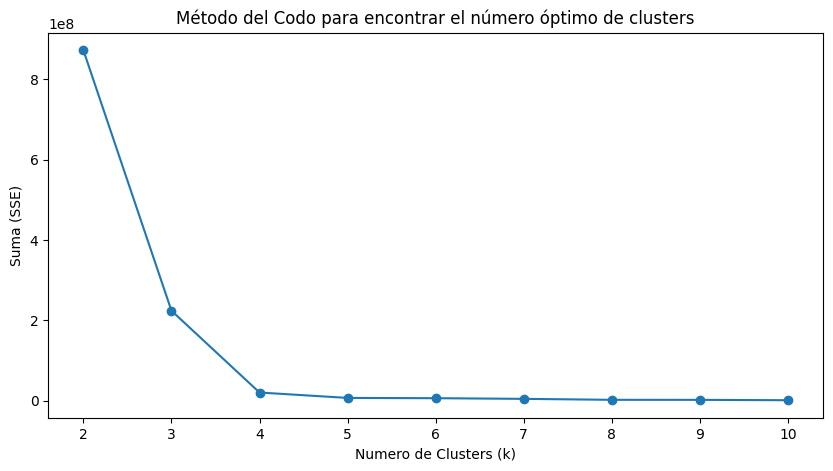

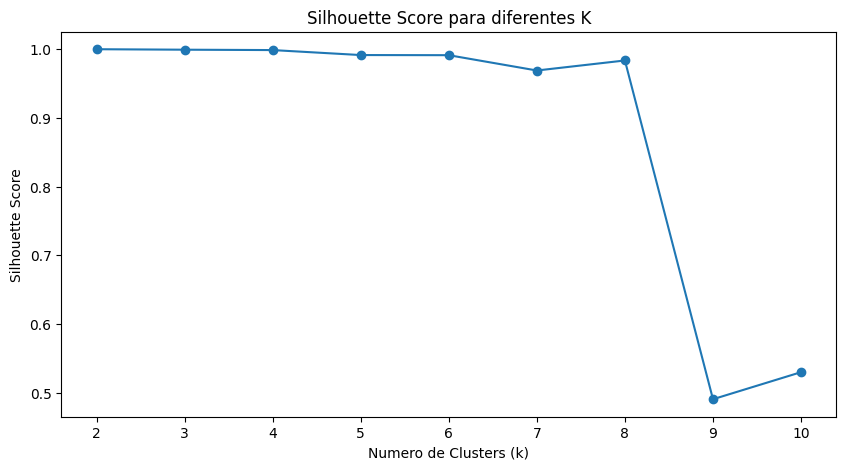

In [24]:
# Modelo 1 : K-means Clustering con Elbow Method y Silhouette Score

# Definición de rangos para número de cluster
k_range = range(2, 11)

sse = []  # Sum of Squared Errors for Elbow Method
silhouette_scores = []  # Silhouette scores

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_numerico_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_numerico_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Gráfico del método del Codo
plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Numero de Clusters (k)')
plt.ylabel('Suma (SSE)')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Numero de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()




In [26]:
# Modelo final de K-means con k óptimo

# Elegir el número óptimo de clusters (según el Método del Codo)
optimal_k = 4

# Entrenar el modelo K-Means con el número óptimo de clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(data_numerico_scaled)

# Evaluar el Silhouette Score
silhouette_kmeans = silhouette_score(data_numerico_scaled, kmeans_optimal.labels_)
print(f"Silhouette Score para K-Means con {optimal_k} clusters: {silhouette_kmeans}")





Silhouette Score para K-Means con 4 clusters: 0.9986089901388329


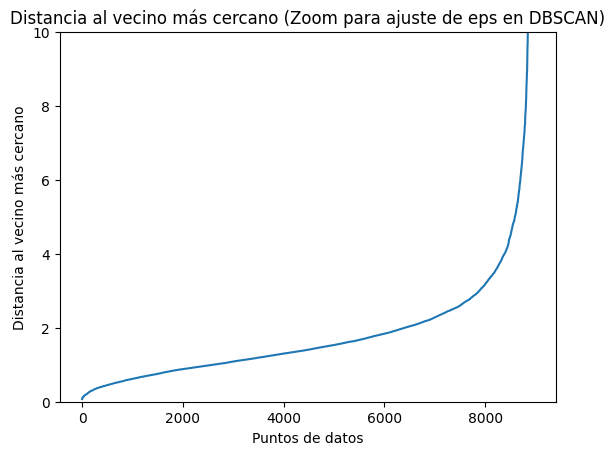

In [22]:
from sklearn.neighbors import NearestNeighbors
# Model 2: DBSCAN


# Paso 1: Obtener el valor inicial de eps mediante vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data_numerico_scaled)
distances, indices = neighbors_fit.kneighbors(data_numerico_scaled)
distances = np.sort(distances[:, 4], axis=0)  # Usamos el quinto vecino

# Graficar las distancias para identificar el "codo" con un zoom en el eje Y
plt.plot(distances)
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia al vecino más cercano")
plt.title("Distancia al vecino más cercano (Zoom para ajuste de eps en DBSCAN)")

# Limitar el rango del eje Y
plt.ylim(0, 10)

plt.show()


In [30]:
from sklearn.model_selection import ParameterGrid


# Definir el valor inicial de eps basado en la observación del "codo"
eps_base = 3

# Crear el rango de valores para eps y min_samples en el ParameterGrid
param_grid = {
    'eps': np.arange(2.5, 3.6, 0.1),     # Rango ajustado alrededor de 3
    'min_samples': range(5, 15)          # Rango de min_samples
}
grid = ParameterGrid(param_grid)

# Variables para almacenar los mejores resultados
best_params = None
best_score = -1
best_dbscan_model = None

# Paso 3: Iterar sobre el grid para encontrar la mejor combinación
for params in grid:
    # Inicializar y ajustar DBSCAN con parámetros actuales
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan_labels = dbscan.fit_predict(data_numerico_scaled)

    # Filtrar solo los puntos en clusters válidos (excluye ruido)
    core_samples_mask = (dbscan_labels != -1)
    if len(set(dbscan_labels[core_samples_mask])) > 1:  # Verifica que haya al menos un clúster
        silhouette_avg = silhouette_score(data_numerico_scaled[core_samples_mask], dbscan_labels[core_samples_mask])

        # Guardar si esta combinación es la mejor hasta ahora
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = params
            best_dbscan_model = dbscan

# Mostrar los mejores parámetros y el índice de Silhouette
print("Mejores parámetros:", best_params)
print("Mejor Silhouette Score:", best_score)

Mejores parámetros: {'eps': 2.5, 'min_samples': 14}
Mejor Silhouette Score: 0.9999615521229146


# Visualization of clusters

# Cluster con Modelo DBSCAN

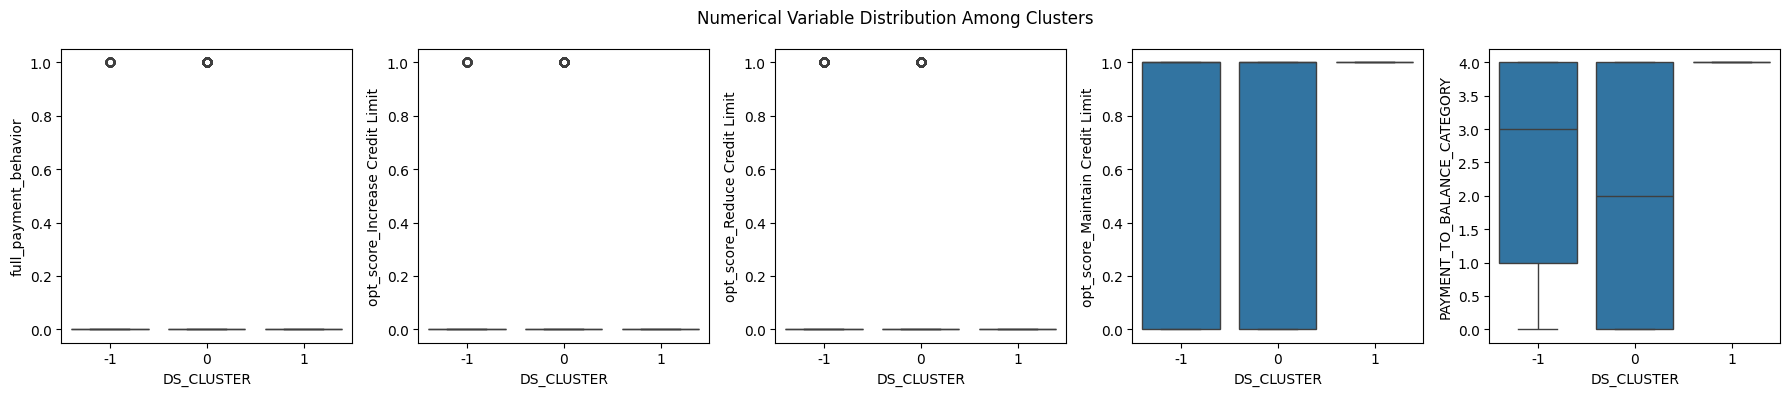

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#DBSCAN

data['DS_CLUSTER'] = dbscan_labels

# Variables numéricas a graficar
fig, axs = plt.subplots(1, 5, figsize=(18, 4))
cols = ['full_payment_behavior', 'opt_score_Increase Credit Limit', 'opt_score_Reduce Credit Limit', 'opt_score_Maintain Credit Limit', 'PAYMENT_TO_BALANCE_CATEGORY']

for i in range(len(cols)):
    sns.boxplot(data=data, x='DS_CLUSTER', y=cols[i], ax=axs[i])


fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

# Interpretation of clusters

**Cluster -1 (Ruido):**

Este es un cluster de puntos considerados como "ruido" por el algoritmo. En los gráficos, los valores de esta clase son relativamente bajos en comparación con otros clusters, lo cual podría sugerir que estos clientes tienen comportamientos menos comunes o están fuera del patrón de gasto observado.

**Cluster 0:**

*   Para full_payment_behavior, opt_score_Increase Credit Limit, y opt_score_Reduce Credit Limit, la mayoría de los valores se encuentran cerca de 0, con pocos valores que llegan a 1. Esto sugiere que los clientes en este cluster no suelen hacer pagos completos de su saldo, y es poco probable que sus límites de crédito se incrementen o reduzcan.
*   opt_score_Maintain Credit Limit muestra un comportamiento mayormente uniforme, con una tendencia de valores alrededor de 0.5, indicando una probabilidad de mantener el límite de crédito.
*   PAYMENT_TO_BALANCE_CATEGORY en el cluster 0 tiene una distribución más amplia, lo que indica que existe una mayor variabilidad en la relación entre el pago y el saldo de estos clientes, sugiriendo diferentes hábitos de pago.

**Cluster 1:**

*   Similar al cluster 0 en full_payment_behavior, opt_score_Increase Credit Limit, y opt_score_Reduce Credit Limit, la mayoría de los clientes en este cluster también tienen valores bajos en estas categorías, indicando que no suelen hacer pagos completos ni experimentar cambios en sus límites de crédito.
*   Para opt_score_Maintain Credit Limit, el valor es consistente, alrededor de 1.0, lo que sugiere que estos clientes tienen una alta probabilidad de mantener su límite de crédito estable.
*   En PAYMENT_TO_BALANCE_CATEGORY, el cluster 1 también muestra una distribución uniforme, aunque levemente más concentrada, indicando que estos clientes suelen tener comportamientos de pago-saldo más constantes.

# RESUMEN
*   **Cluster -1:** Contiene puntos de ruido con un comportamiento variable en cuanto a la relación pago-saldo (PAYMENT_TO_BALANCE_CATEGORY). Este cluster podría contener clientes que no siguen un patrón claro.
*   **Clusters 0 y 1:** Contienen la mayoría de los clientes con un comportamiento de pago y balance más uniforme. La mayoría de los clientes en estos clusters no necesitan un ajuste en su límite de crédito (indicados por valores bajos en opt_score_Increase Credit Limit y opt_score_Reduce Credit Limit), lo que sugiere que se recomienda mantener su límite actual.

# CLUSTER CON MODELO K-MEANS

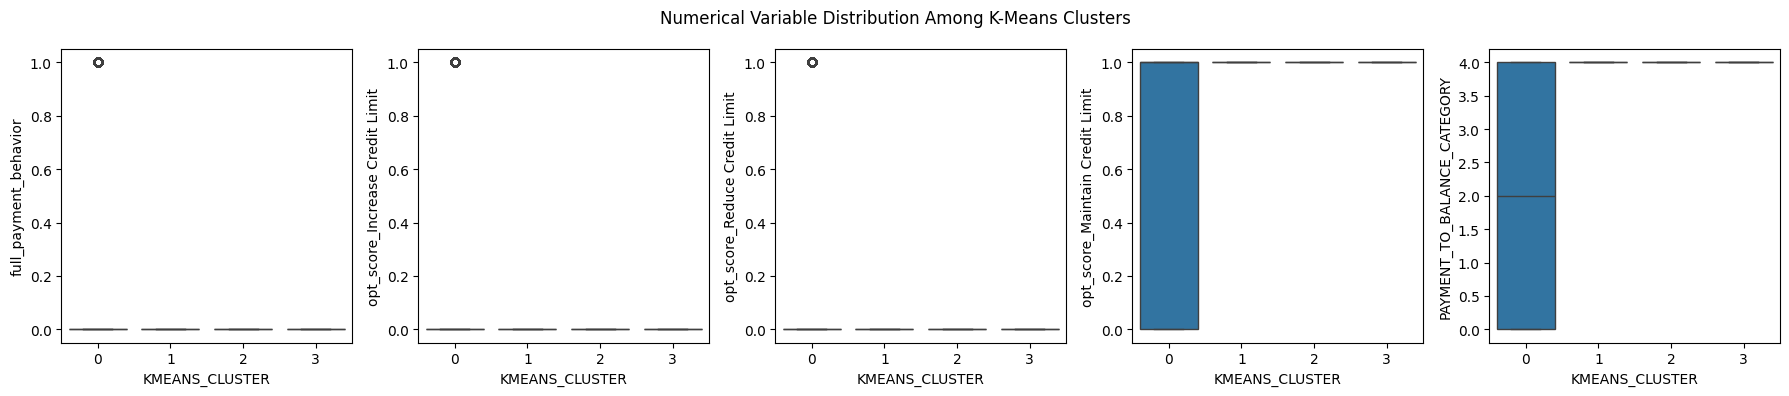

In [28]:
#K-MEANS

data['KMEANS_CLUSTER'] = kmeans_optimal.labels_


# Variables numéricas a graficar
fig, axs = plt.subplots(1, 5, figsize=(18, 4))
cols = ['full_payment_behavior', 'opt_score_Increase Credit Limit', 'opt_score_Reduce Credit Limit',
        'opt_score_Maintain Credit Limit', 'PAYMENT_TO_BALANCE_CATEGORY']

# Graficar las variables numéricas en relación con los clusters de K-means
for i in range(len(cols)):
    sns.boxplot(data=data, x='KMEANS_CLUSTER', y=cols[i], ax=axs[i])

fig.suptitle('Numerical Variable Distribution Among K-Means Clusters')
plt.tight_layout()
plt.show()

**Cluster 0**
*   full_payment_behavior: La mayoría de los clientes tienen un comportamiento de pago total bajo, aunque se observan algunos outliers que realizan pagos completos.
*   opt_score_Increase Credit Limit y opt_score_Reduce Credit Limit: Estas variables son bajas en general, aunque se observan algunos valores atípicos altos, indicando que solo unos pocos clientes en este cluster tienen un puntaje significativo para aumentar o reducir su límite de crédito.
*   opt_score_Maintain Credit Limit: La mayoría de los clientes tienen un alto puntaje en esta variable, lo que indica que mantener su límite de crédito es importante para ellos.
*   PAYMENT_TO_BALANCE_CATEGORY: Existe más variabilidad en esta categoría en comparación con otros clusters, lo que sugiere que este grupo tiene clientes con una mayor diversidad en la relación entre pagos y saldo.

**Cluster 1**
*   full_payment_behavior: Valores principalmente bajos, lo que indica un bajo nivel de comportamiento de pago total entre los clientes.
*   opt_score_Increase Credit Limit y opt_score_Reduce Credit Limit: Ambas variables son consistentemente bajas, sin valores atípicos altos. Esto implica que en este cluster, los clientes no están muy interesados en ajustar su límite de crédito.
*   opt_score_Maintain Credit Limit: Similar al cluster 0, la mayoría de los clientes muestran un alto puntaje en mantener el límite de crédito.
*   PAYMENT_TO_BALANCE_CATEGORY: Sin variabilidad; todos los clientes tienen valores bajos en esta categoría.


**Cluster 2**
*   full_payment_behavior: Al igual que en los clusters anteriores, los valores son bajos, sin grandes diferencias.
*   opt_score_Increase Credit Limit y opt_score_Reduce Credit Limit: Ambas variables son bajas y sin outliers, indicando que estos clientes no buscan modificar su límite de crédito.
opt_score_Maintain Credit Limit: Consistentemente alto, similar a los clusters 0 y 1.
*   PAYMENT_TO_BALANCE_CATEGORY: Baja y homogénea.

**Cluster 3**
*   full_payment_behavior: Los valores son bajos y consistentes.
*   opt_score_Increase Credit Limit y opt_score_Reduce Credit Limit: Ambas variables también son bajas y sin variabilidad, indicando un desinterés en el ajuste del límite de crédito.
*   opt_score_Maintain Credit Limit: Todos los clientes en este cluster muestran un alto puntaje en mantener su límite de crédito.
*   PAYMENT_TO_BALANCE_CATEGORY: Similar a los clusters 1 y 2, con una baja relación de pagos a saldo y sin variabilidad.


# RESUMEN
*  **Cluster 0:**  contiene clientes que tienen comportamientos diversos en cuanto a su relación de pagos y saldo. Sin embargo, la mayoría mantiene bajo el comportamiento de pago total y están interesados en mantener su límite de crédito.
*   **Clusters 1, 2 y 3:** son muy similares entre sí, con clientes que muestran bajo comportamiento de pago total, bajo interés en ajustar sus límites de crédito y una baja relación de pagos a saldo.